# Classification - Support Vector Machine

External Sources used:
http://scikit-learn.org/stable/modules/svm.html

http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html#sphx-glr-auto-examples-svm-plot-iris-py

https://stackoverflow.com/questions/39839112/the-easiest-way-for-getting-feature-names-after-running-selectkbest-in-scikit-le

## For this task, Pandas and sklearn have been used

- Loading wine dataset from sklearn datasets. 
- Spliting the dataset 70% for training, and 30% for testing the classifier.
- Selecting only 2 attributes for training and testing the model. 
- Using One-vs-One method. 
- Trying with a linear, and non-linear kernel polynomial=3 and Gaussian RBF.
- Calculating and printing the confusion matrix, and the classification Report (including: precision, recall, f1-score, and support) for linear and non-linear kernels. 
- Plotting the classifier in a 2D projection for linear and non-linear kernels.

In [20]:
from sklearn import datasets
wine= datasets.load_wine()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
x= wine.data
y= wine.target
X=x[:, 6:8] # Selecting 2 features and splitting the dataset 70% for training and 30% for testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state= 21,stratify=y)


In [7]:
from sklearn import svm
from sklearn.svm import SVC

In [8]:
clf1 = svm.SVC(kernel='linear') # Prediction using kernel= 'linear'
clf1.fit(x_train,y_train)
lin = clf1.predict(x_test)
print(lin)

[2 2 1 0 2 0 0 2 0 1 0 0 0 0 1 2 1 1 2 0 1 2 0 0 0 2 2 1 0 0 1 1 0 1 0 0 0
 2 1 1 1 0 2 1 0 2 2 1 0 1 1 1 0 0]


In [9]:
clf2= svm.SVC(kernel = 'poly', degree=3 ) # Prediction using kernel= 'polynomial'
clf2.fit(x_train,y_train)
non_lin1=clf2.predict(x_test)
print(non_lin1)

[2 2 1 0 2 0 0 2 0 2 0 0 0 0 1 2 1 1 2 0 1 2 0 0 0 2 2 2 0 0 1 1 0 1 0 0 0
 2 1 2 1 0 2 1 0 2 2 1 0 1 1 1 0 0]


In [10]:
clf3 = svm.SVC(kernel='rbf')  # Prediction using kernel='rbf'
clf3.fit(x_train,y_train)
non_lin2 = clf3.predict(x_test)
print(non_lin2)

[2 2 1 0 2 0 0 2 0 1 0 0 0 0 1 2 1 1 2 0 1 2 0 0 0 2 2 1 0 0 1 1 0 1 0 0 0
 2 1 1 0 0 2 1 0 2 2 1 0 1 1 1 0 0]


In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [19]:
print(confusion_matrix(y_test,lin)) # confusion matrix for kernel='linear'

[[17  1  0]
 [ 6 14  1]
 [ 0  3 12]]


In [13]:
t= wine.target_names # classification report for kernel= ' linear'
print(classification_report(y_test, lin, target_names = t))

             precision    recall  f1-score   support

    class_0       0.74      0.94      0.83        18
    class_1       0.78      0.67      0.72        21
    class_2       0.92      0.80      0.86        15

avg / total       0.81      0.80      0.79        54



In [14]:
print(confusion_matrix(y_test, non_lin1)) # confusion matrix for kernel=' polynomial'

[[17  1  0]
 [ 6 13  2]
 [ 0  1 14]]


In [15]:
t = wine.target_names # classification report for kernel= 'polynomial'
print(classification_report(y_test, non_lin1, target_names = t))

             precision    recall  f1-score   support

    class_0       0.74      0.94      0.83        18
    class_1       0.87      0.62      0.72        21
    class_2       0.88      0.93      0.90        15

avg / total       0.83      0.81      0.81        54



In [16]:
print(confusion_matrix(y_test, non_lin2)) # confusion matrix for kernel = 'rbf'

[[18  0  0]
 [ 6 14  1]
 [ 0  3 12]]


In [17]:
t = wine.target_names # classification report for kernel= 'rbf'
print(classification_report(y_test, non_lin2, target_names = t)) 

             precision    recall  f1-score   support

    class_0       0.75      1.00      0.86        18
    class_1       0.82      0.67      0.74        21
    class_2       0.92      0.80      0.86        15

avg / total       0.83      0.81      0.81        54



Automatically created module for IPython interactive environment


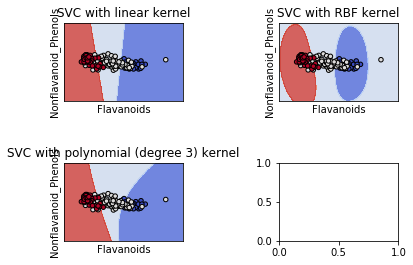

In [18]:
# Plotting the classifier for kernel='linear', kernel= 'polynomial', kernel= 'rbf'
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in
 Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """ 

    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h)) 

    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

 


# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.8, hspace=0.8)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Flavanoids')
    ax.set_ylabel('Nonflavanoid_Phenols')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()